In [1]:
# Author : Gaurab Dutta
# Email : gaurabdutta8@gmail.com
# Project : Health Insurance Lead Prediction

## Importing Libraries

In [61]:
# Load jupyter browser notification extension
%load_ext jupyternotify
# %reload_ext jupyternotify
# %%notify

<IPython.core.display.Javascript object>

In [2]:
# Importing basic labraries
import time
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [58]:
# sklearn modules
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report, recall_score, precision_score
from sklearn.metrics import plot_confusion_matrix

In [4]:
# Ignore all warnings
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='ignore', category=DeprecationWarning)

In [5]:
# Get multiple outputs in the same cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [39]:
# Display all rows and columns of a dataframe instead of a truncated version
from IPython.display import display
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Importing DataSet

In [ ]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 102C-9CE7

 Directory of C:\Users\Gaurab\Workspace\Capstone_Project\Health Insurance Lead Prediction

26-02-2021  09:15    <DIR>          .
26-02-2021  09:15    <DIR>          ..
26-02-2021  09:11    <DIR>          .ipynb_checkpoints
26-02-2021  09:07           174,452 sample_submission.csv
26-02-2021  09:07         1,268,506 test.csv
26-02-2021  09:07         3,049,673 train.csv
26-02-2021  09:15             2,095 Untitled.ipynb
               4 File(s)      4,494,726 bytes
               3 Dir(s)  175,785,435,136 bytes free


In [6]:
train_data = pd.read_csv('train.csv')
train_data.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0


In [7]:
test_data = pd.read_csv('test.csv')
test_data.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium
0,50883,C1,156,Owned,Individual,30,30,No,NaN,6.0,3.0,5,11934.0
1,50884,C4,7,Owned,Joint,69,68,Yes,X1,3.0,3.0,18,32204.8
2,50885,C1,564,Rented,Individual,28,28,No,X3,2.0,4.0,17,9240.0
3,50886,C3,1177,Rented,Individual,23,23,No,X3,3.0,3.0,18,9086.0
4,50887,C1,951,Owned,Individual,75,75,No,X3,NaN,NaN,5,22534.0


## Understanding the data

In [ ]:
train_data.shape
test_data.shape

(50882, 14)

(21805, 13)

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50882 entries, 0 to 50881
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       50882 non-null  int64  
 1   City_Code                50882 non-null  object 
 2   Region_Code              50882 non-null  int64  
 3   Accomodation_Type        50882 non-null  object 
 4   Reco_Insurance_Type      50882 non-null  object 
 5   Upper_Age                50882 non-null  int64  
 6   Lower_Age                50882 non-null  int64  
 7   Is_Spouse                50882 non-null  object 
 8   Health Indicator         39191 non-null  object 
 9   Holding_Policy_Duration  30631 non-null  object 
 10  Holding_Policy_Type      30631 non-null  float64
 11  Reco_Policy_Cat          50882 non-null  int64  
 12  Reco_Policy_Premium      50882 non-null  float64
 13  Response                 50882 non-null  int64  
dtypes: float64(2), int64(6

In [ ]:
train_data.nunique()

ID                         50882
City_Code                     36
Region_Code                 5316
Accomodation_Type              2
Reco_Insurance_Type            2
Upper_Age                     58
Lower_Age                     60
Is_Spouse                      2
Health Indicator               9
Holding_Policy_Duration       15
Holding_Policy_Type            4
Reco_Policy_Cat               22
Reco_Policy_Premium         6977
Response                       2
dtype: int64

In [ ]:
train_data.columns[train_data.dtypes == object]

Index(['City_Code', 'Accomodation_Type', 'Reco_Insurance_Type', 'Is_Spouse',
       'Health Indicator', 'Holding_Policy_Duration'],
      dtype='object')

In [ ]:
train_data.describe()
train_data.describe(include=['O'])

,ID,Region_Code,Upper_Age,Lower_Age,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
count,50882.000000,50882.000000,50882.000000,50882.000000,30631.000000,50882.000000,50882.000000,50882.000000
mean,25441.500000,1732.788707,44.856275,42.738866,2.439228,15.115188,14183.950069,0.239947
std,14688.512535,1424.081652,17.310271,17.319375,1.025923,6.340663,6590.074873,0.427055
min,1.000000,1.000000,18.000000,16.000000,1.000000,1.000000,2280.000000,0.000000
25%,12721.250000,523.000000,28.000000,27.000000,1.000000,12.000000,9248.000000,0.000000
50%,25441.500000,1391.000000,44.000000,40.000000,3.000000,17.000000,13178.000000,0.000000
75%,38161.750000,2667.000000,59.000000,57.000000,3.000000,20.000000,18096.000000,0.000000
max,50882.000000,6194.000000,75.000000,75.000000,4.000000,22.000000,43350.400000,1.000000


,City_Code,Accomodation_Type,Reco_Insurance_Type,Is_Spouse,Health Indicator,Holding_Policy_Duration
count,50882,50882,50882,50882,39191,30631
unique,36,2,2,2,9,15
top,C1,Owned,Individual,No,X1,1.0
freq,8973,27951,40536,42460,13010,4499


## Handling Null values & cleaning the data

In [ ]:
train_data.isnull().sum()

ID                             0
City_Code                      0
Region_Code                    0
Accomodation_Type              0
Reco_Insurance_Type            0
Upper_Age                      0
Lower_Age                      0
Is_Spouse                      0
Health Indicator           11691
Holding_Policy_Duration    20251
Holding_Policy_Type        20251
Reco_Policy_Cat                0
Reco_Policy_Premium            0
Response                       0
dtype: int64

In [ ]:
test_data.isnull().sum()

ID                            0
City_Code                     0
Region_Code                   0
Accomodation_Type             0
Reco_Insurance_Type           0
Upper_Age                     0
Lower_Age                     0
Is_Spouse                     0
Health Indicator           5027
Holding_Policy_Duration    8603
Holding_Policy_Type        8603
Reco_Policy_Cat               0
Reco_Policy_Premium           0
dtype: int64

In [ ]:
train_data[train_data.columns[train_data.isnull().sum()!=0]].isnull().sum().count()

3

In [ ]:
train_data['Health Indicator'].unique()
train_data['Holding_Policy_Duration'].unique()
train_data['Holding_Policy_Type'].unique()

array(['X1', 'X2', nan, 'X4', 'X3', 'X6', 'X5', 'X8', 'X7', 'X9'],
      dtype=object)

array(['14+', nan, '1.0', '3.0', '5.0', '9.0', '14.0', '7.0', '2.0',
       '11.0', '10.0', '8.0', '6.0', '4.0', '13.0', '12.0'], dtype=object)

array([ 3., nan,  1.,  4.,  2.])

<AxesSubplot:>

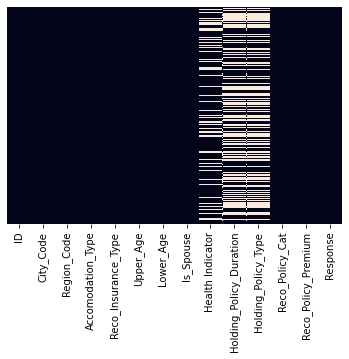

In [ ]:
# plt.figure(figsize=(10,6))
sns.heatmap(train_data.isnull(), yticklabels=False, cbar=False)

<AxesSubplot:>

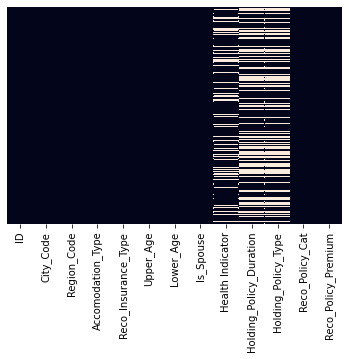

In [ ]:
# plt.figure(figsize=(10,6))
sns.heatmap(test_data.isnull(), yticklabels=False, cbar=False)

In [ ]:
train_data['Health Indicator'].mode()
train_data['Holding_Policy_Duration'].mode()
train_data['Holding_Policy_Type'].mean()
train_data['Holding_Policy_Type'].median()

0    X1
dtype: object

0    1.0
dtype: object

2.4392282328360158

3.0

In [8]:
# Dropping the ID column.
train_df = train_data.drop(['ID'], axis=1)
test_df = test_data.drop(['ID'], axis=1)

In [9]:
# Filling the null values in 'Health Indicator' column with the mode.
train_df['Health Indicator'] = train_df['Health Indicator'].fillna(train_df['Health Indicator'].mode()[0])
test_df['Health Indicator'] = test_df['Health Indicator'].fillna(test_df['Health Indicator'].mode()[0])

In [10]:
# Filling the null values in 'Holding_Policy_Duration' column with the mode.
train_df['Holding_Policy_Duration'] = train_df['Holding_Policy_Duration'].fillna(train_df['Holding_Policy_Duration'].mode()[0])
test_df['Holding_Policy_Duration'] = test_df['Holding_Policy_Duration'].fillna(test_df['Holding_Policy_Duration'].mode()[0])

In [11]:
# Filling the null values in 'Holding_Policy_Duration' column with the median.
train_df['Holding_Policy_Type'] = train_df['Holding_Policy_Type'].fillna(train_df['Holding_Policy_Type'].median())
test_df['Holding_Policy_Type'] = test_df['Holding_Policy_Type'].fillna(test_df['Holding_Policy_Type'].median())

<AxesSubplot:>

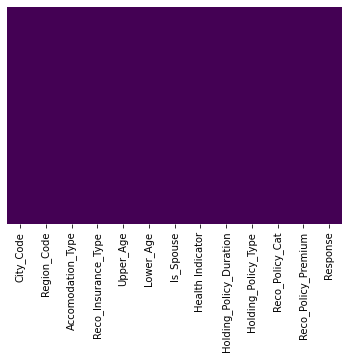

In [ ]:
# checking for null values
sns.heatmap(train_df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [ ]:
train_df.describe()
train_data.describe(include = ['O'])

,Region_Code,Upper_Age,Lower_Age,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
count,50882.000000,50882.000000,50882.000000,50882.000000,50882.000000,50882.000000,50882.000000
mean,1732.788707,44.856275,42.738866,2.662415,15.115188,14183.950069,0.239947
std,1424.081652,17.310271,17.319375,0.841994,6.340663,6590.074873,0.427055
min,1.000000,18.000000,16.000000,1.000000,1.000000,2280.000000,0.000000
25%,523.000000,28.000000,27.000000,2.000000,12.000000,9248.000000,0.000000
50%,1391.000000,44.000000,40.000000,3.000000,17.000000,13178.000000,0.000000
75%,2667.000000,59.000000,57.000000,3.000000,20.000000,18096.000000,0.000000
max,6194.000000,75.000000,75.000000,4.000000,22.000000,43350.400000,1.000000


,City_Code,Accomodation_Type,Reco_Insurance_Type,Is_Spouse,Health Indicator,Holding_Policy_Duration
count,50882,50882,50882,50882,39191,30631
unique,36,2,2,2,9,15
top,C1,Owned,Individual,No,X1,1.0
freq,8973,27951,40536,42460,13010,4499


## Checking for duplicates

In [ ]:
train_df[train_df.duplicated()]

,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response


In [ ]:
train_df.columns.duplicated()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False])

## Correlation Check

In [ ]:
train_df.corr()

,Region_Code,Upper_Age,Lower_Age,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
Region_Code,1.000000,-0.005649,-0.005928,0.009348,-0.065120,-0.010797,0.001121
Upper_Age,-0.005649,1.000000,0.921392,0.002579,0.025257,0.792689,0.002772
Lower_Age,-0.005928,0.921392,1.000000,-0.001842,0.021163,0.615739,-0.002099
Holding_Policy_Type,0.009348,0.002579,-0.001842,1.000000,0.053760,0.012266,0.006208
Reco_Policy_Cat,-0.065120,0.025257,0.021163,0.053760,1.000000,0.060989,0.114321
Reco_Policy_Premium,-0.010797,0.792689,0.615739,0.012266,0.060989,1.000000,0.007943
Response,0.001121,0.002772,-0.002099,0.006208,0.114321,0.007943,1.000000


<Figure size 576x576 with 0 Axes>

<AxesSubplot:>

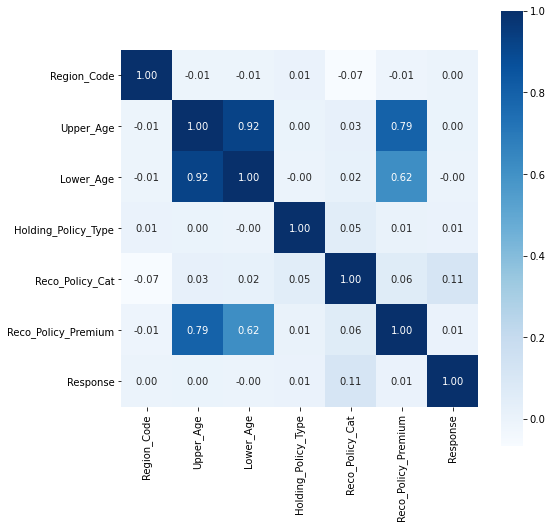

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(train_df.corr(), xticklabels=train_df.corr().columns, yticklabels=train_df.corr().columns, square=True, annot=True, fmt='0.2f', cmap='Blues')

As it is evident from the above correlation plot that upper age & lower age are highly correlated, we can take the average of both into a single column thus reducing the dimensionality.

In [12]:
# Taking the average of age
train_df.insert(6, 'Age', [round((train_df['Upper_Age'][i] + train_df['Lower_Age'][i])/2) for i in train_df.index])
train_df.drop(columns=['Upper_Age', 'Lower_Age'], axis=1, inplace=True)
train_df.head()

,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,C3,3213,Rented,Individual,36,No,X1,14+,3.0,22,11628.0,0
1,C5,1117,Owned,Joint,48,No,X2,1.0,3.0,22,30510.0,0
2,C5,3732,Owned,Individual,32,No,X1,1.0,1.0,19,7450.0,1
3,C24,4378,Owned,Joint,50,No,X1,14+,3.0,19,17780.0,0
4,C8,2190,Rented,Individual,44,No,X2,3.0,1.0,16,10404.0,0


In [13]:
# Same for test data
test_df.insert(6, 'Age', [round((test_df['Upper_Age'][i] + test_df['Lower_Age'][i])/2) for i in test_df.index])
test_df.drop(columns=['Upper_Age', 'Lower_Age'], axis=1, inplace=True)

## Exploratory Data Analysis

In [14]:
# creating a copy of the dataframe
eda = train_df.copy()

In [ ]:
eda.head()

,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,C3,3213,Rented,Individual,36,No,X1,14+,3.0,22,11628.0,0
1,C5,1117,Owned,Joint,48,No,X2,1.0,3.0,22,30510.0,0
2,C5,3732,Owned,Individual,32,No,X1,1.0,1.0,19,7450.0,1
3,C24,4378,Owned,Joint,50,No,X1,14+,3.0,19,17780.0,0
4,C8,2190,Rented,Individual,44,No,X2,3.0,1.0,16,10404.0,0


0    38673
1    12209
Name: Response, dtype: int64


<AxesSubplot:xlabel='Response', ylabel='count'>

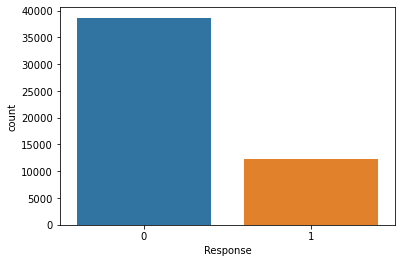

In [ ]:
print(eda.Response.value_counts())
sns.countplot(x="Response", data=eda)

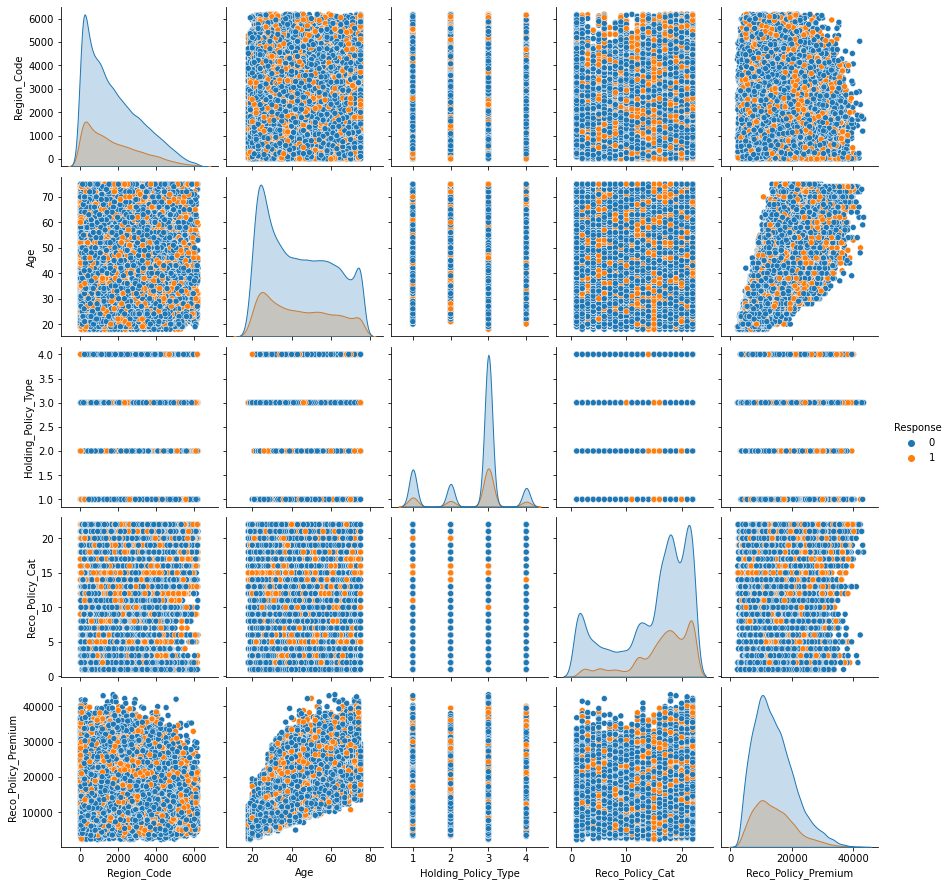

<IPython.core.display.Javascript object>

In [73]:
%%notify
sns.pairplot(eda, hue='Response')

Age and Reco_Policy_Premium have some relationship.

<Figure size 576x288 with 0 Axes>

<AxesSubplot:xlabel='Reco_Policy_Cat', ylabel='Density'>

<AxesSubplot:xlabel='Reco_Policy_Cat', ylabel='Density'>

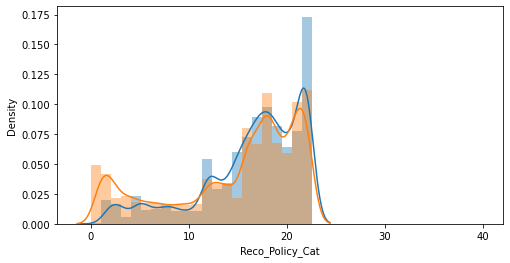

In [77]:
plt.figure(figsize=(8,4))
sns.distplot(eda.Reco_Policy_Cat[eda.Response == 1], bins = np.linspace(0,40,40))
sns.distplot(eda.Reco_Policy_Cat[eda.Response == 0], bins = np.linspace(0,40,40))

<Figure size 576x288 with 0 Axes>

<AxesSubplot:xlabel='Reco_Policy_Premium', ylabel='Density'>

<AxesSubplot:xlabel='Reco_Policy_Premium', ylabel='Density'>

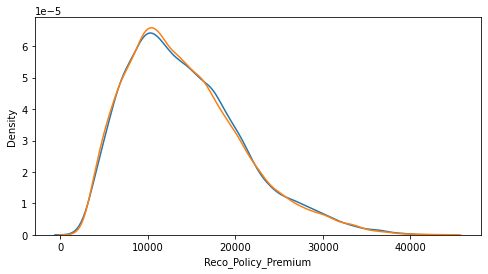

In [78]:
plt.figure(figsize=(8,4))
sns.distplot(eda.Reco_Policy_Premium[eda.Response == 1], bins = np.linspace(0,40,40))
sns.distplot(eda.Reco_Policy_Premium[eda.Response == 0], bins = np.linspace(0,40,40))

<Figure size 864x576 with 0 Axes>

Text(0.5, 1.0, 'Percent Distribution of city code by response')

<AxesSubplot:title={'center':'Percent Distribution of city code by response'}, xlabel='City_Code', ylabel='percentage'>

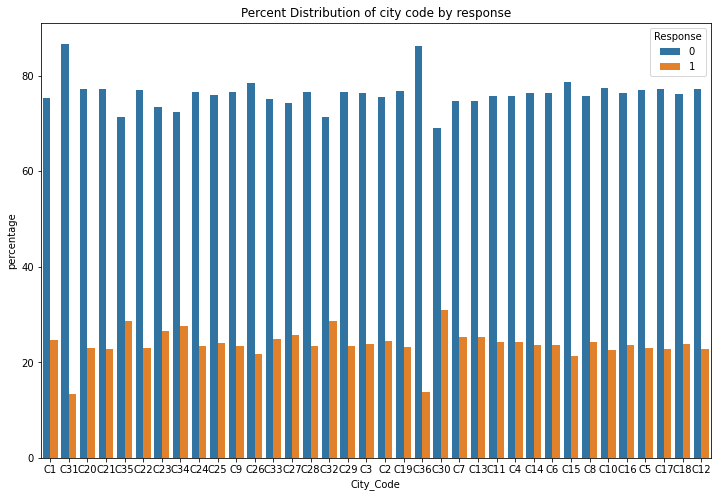

In [ ]:
response_count = (eda.groupby(['City_Code'])['Response']
                  .value_counts(normalize=True)
                  .rename('percentage')
                  .mul(100)
                  .reset_index()
                  .sort_values('Response')
                 )
# print(response_count)
plt.figure(figsize=(12,8))
plt.title('Percent Distribution of city code by response')
sns.barplot(x="City_Code", y="percentage", hue="Response", data=response_count)

We can see that city code C31 & C36 has a very low positive response whereas C30, C32, C34, C35 have a slight higher positive response rate compared to others.

<Figure size 864x576 with 0 Axes>

Text(0.5, 1.0, 'Percent Distribution of Health Indicator by response')

<AxesSubplot:title={'center':'Percent Distribution of Health Indicator by response'}, xlabel='Health Indicator', ylabel='percentage'>

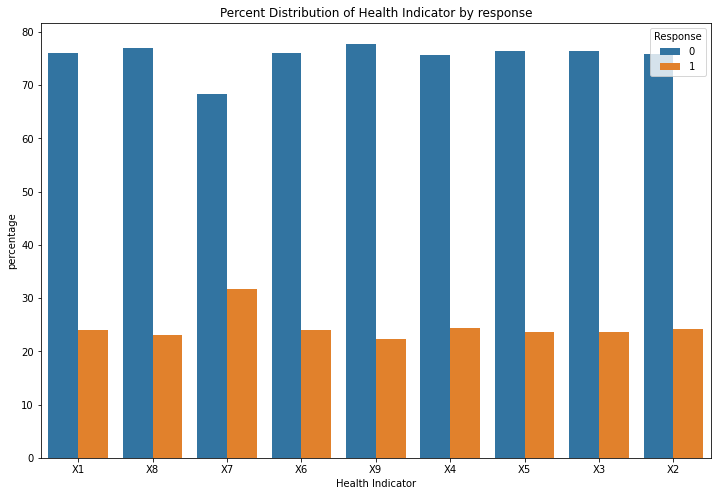

In [ ]:
response_count = (eda.groupby(['Health Indicator'])['Response']
                  .value_counts(normalize=True)
                  .rename('percentage')
                  .mul(100)
                  .reset_index()
                  .sort_values('Response')
                 )
# print(response_count)
plt.figure(figsize=(12,8))
plt.title('Percent Distribution of Health Indicator by response')
sns.barplot(x="Health Indicator", y="percentage", hue="Response", data=response_count)

The response rate for all the health indicators are nearly same except for X7, where the positive response comparatively higher then others.

<AxesSubplot:xlabel='Holding_Policy_Duration', ylabel='count'>

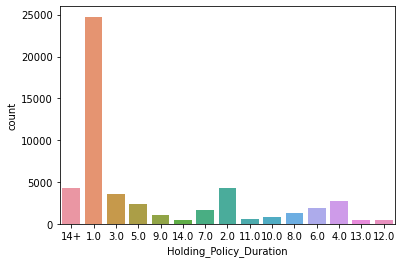

In [51]:
sns.countplot(x="Holding_Policy_Duration", data=eda)

Around 50% of the data has policy duration 1year and all other durations comprises of the rest 50% of the data.

<Figure size 864x576 with 0 Axes>

Text(0.5, 1.0, 'Percent Distribution of Holding Policy Duration by response')

<AxesSubplot:title={'center':'Percent Distribution of Holding Policy Duration by response'}, xlabel='Holding_Policy_Duration', ylabel='percentage'>

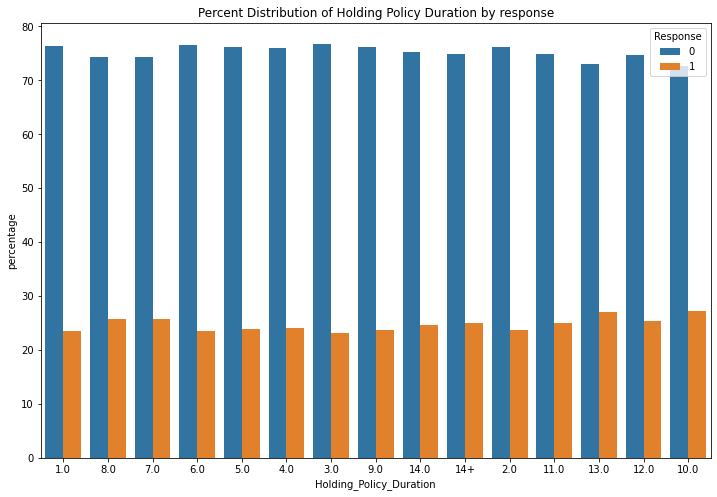

In [ ]:
response_count = (eda.groupby(['Holding_Policy_Duration'])['Response']
                  .value_counts(normalize=True)
                  .rename('percentage')
                  .mul(100)
                  .reset_index()
                  .sort_values('Response')
                 )
# print(response_count)
plt.figure(figsize=(12,8))
plt.title('Percent Distribution of Holding Policy Duration by response')
sns.barplot(x="Holding_Policy_Duration", y="percentage", hue="Response", data=response_count)

Holding Policy Duration has not much of an impact in the response rate as it is nearly similar over all duration periods.

## Handling Categorical Features

In [ ]:
train_df[train_df.columns[train_df.dtypes == object]].nunique()

City_Code                  36
Accomodation_Type           2
Reco_Insurance_Type         2
Is_Spouse                   2
Health Indicator            9
Holding_Policy_Duration    15
dtype: int64

In [ ]:
test_df[test_df.columns[test_df.dtypes == object]].nunique()

City_Code                  36
Accomodation_Type           2
Reco_Insurance_Type         2
Is_Spouse                   2
Health Indicator            9
Holding_Policy_Duration    15
dtype: int64

In [15]:
# Label encoding the categorical variables with two unique values
le = LabelEncoder()
df = train_df.copy()
df['Accomodation_Type'] = le.fit_transform(df['Accomodation_Type'])
df['Reco_Insurance_Type'] = le.fit_transform(df['Reco_Insurance_Type'])
df['Is_Spouse'] = le.fit_transform(df['Is_Spouse'])

In [16]:
# Converting categorical variables for test dataset also.
test_df['Accomodation_Type'] = test_df['Accomodation_Type'].map({'Rented':1, 'Owned':0})
test_df['Reco_Insurance_Type'] = test_df['Reco_Insurance_Type'].map({'Joint':1, 'Individual':0})
test_df['Is_Spouse'] = test_df['Is_Spouse'].map({'Yes':1, 'No':0})

In [ ]:
train_df[train_df.Holding_Policy_Duration == '14+'].shape[0]

4335

In [ ]:
train_df['City_Code'].unique()
train_df['Health Indicator'].unique()
train_df['Holding_Policy_Duration'].unique()

array(['C3', 'C5', 'C24', 'C8', 'C9', 'C1', 'C15', 'C28', 'C27', 'C7',
       'C20', 'C25', 'C4', 'C2', 'C34', 'C10', 'C17', 'C18', 'C16', 'C29',
       'C33', 'C26', 'C19', 'C6', 'C12', 'C13', 'C11', 'C14', 'C22',
       'C23', 'C21', 'C36', 'C32', 'C30', 'C35', 'C31'], dtype=object)

array(['X1', 'X2', 'X4', 'X3', 'X6', 'X5', 'X8', 'X7', 'X9'], dtype=object)

array(['14+', '1.0', '3.0', '5.0', '9.0', '14.0', '7.0', '2.0', '11.0',
       '10.0', '8.0', '6.0', '4.0', '13.0', '12.0'], dtype=object)

In [17]:
df = df.rename(columns={"Health Indicator": "Health_Indicator"})
test_df = test_df.rename(columns={"Health Indicator": "Health_Indicator"})

In [18]:
# Assigning 14+ policy duration as 16 to make the column numerical
df['Holding_Policy_Duration'] = df['Holding_Policy_Duration'].replace(to_replace='14+', value=16.0)
df.Holding_Policy_Duration = pd.to_numeric(df.Holding_Policy_Duration)

test_df['Holding_Policy_Duration'] = test_df['Holding_Policy_Duration'].replace(to_replace='14+', value=16.0)
test_df.Holding_Policy_Duration = pd.to_numeric(test_df.Holding_Policy_Duration)

In [71]:
df['Holding_Policy_Duration'].dtype

dtype('float64')

In [19]:
# Converting City_Code & Health_Indicator columns into numerical values.
for i in range(len(df.City_Code)):
    df.City_Code[i] = int(''.join([j for j in df.City_Code[i] if j != 'C']))
df.City_Code = pd.to_numeric(df.City_Code)

for i in range(len(df.Health_Indicator)):
    df.Health_Indicator[i] = int(''.join([j for j in df.Health_Indicator[i] if j != 'X']))
df.Health_Indicator = pd.to_numeric(df.Health_Indicator)

In [20]:
# Applying same changes to the test dataset
for i in range(len(test_df.City_Code)):
    test_df.City_Code[i] = int(''.join([j for j in test_df.City_Code[i] if j != 'C']))
test_df.City_Code = pd.to_numeric(test_df.City_Code)

for i in range(len(test_df.Health_Indicator)):
    test_df.Health_Indicator[i] = int(''.join([j for j in test_df.Health_Indicator[i] if j != 'X']))
test_df.Health_Indicator = pd.to_numeric(test_df.Health_Indicator)

In [22]:
df.columns[df.dtypes == object]

Index([], dtype='object')

In [30]:
df['Holding_Policy_Duration'] = df['Holding_Policy_Duration'].astype(int)
df['Holding_Policy_Type'] = df['Holding_Policy_Type'].astype(int)
df['Reco_Policy_Premium'] = df['Reco_Policy_Premium'].astype(int)

In [ ]:
test_df['Holding_Policy_Duration'] = test_df['Holding_Policy_Duration'].astype(int)
test_df['Holding_Policy_Type'] = test_df['Holding_Policy_Type'].astype(int)
test_df['Reco_Policy_Premium'] = test_df['Reco_Policy_Premium'].astype(int)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50882 entries, 0 to 50881
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   City_Code                50882 non-null  int64
 1   Region_Code              50882 non-null  int64
 2   Accomodation_Type        50882 non-null  int32
 3   Reco_Insurance_Type      50882 non-null  int32
 4   Age                      50882 non-null  int64
 5   Is_Spouse                50882 non-null  int32
 6   Health_Indicator         50882 non-null  int64
 7   Holding_Policy_Duration  50882 non-null  int32
 8   Holding_Policy_Type      50882 non-null  int32
 9   Reco_Policy_Cat          50882 non-null  int64
 10  Reco_Policy_Premium      50882 non-null  int32
 11  Response                 50882 non-null  int64
dtypes: int32(6), int64(6)
memory usage: 3.5 MB


In [21]:
df

,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Age,Is_Spouse,Health_Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,3,3213,1,0,36,0,1,16.0,3.0,22,11628.0,0
1,5,1117,0,1,48,0,2,1.0,3.0,22,30510.0,0
2,5,3732,0,0,32,0,1,1.0,1.0,19,7450.0,1
3,24,4378,0,1,50,0,1,16.0,3.0,19,17780.0,0
4,8,2190,1,0,44,0,2,3.0,1.0,16,10404.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
50877,4,845,1,0,22,0,3,1.0,3.0,18,7704.0,0
50878,5,4188,1,0,27,0,3,7.0,3.0,4,5408.0,0
50879,1,442,1,0,63,0,2,16.0,1.0,12,11374.0,0
50880,1,4,0,1,60,0,2,2.0,2.0,16,28179.2,1


In [ ]:
%%notify
sns.pairplot(df, hue='Response')

## Zero Variance Check

In [86]:
var_thres = VarianceThreshold(threshold=0.0)
var_thres.fit(df)

VarianceThreshold()

In [87]:
var_thres.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [88]:
df.columns[var_thres.get_support() == False]

Index([], dtype='object')

## Split the data into Train-Test

In [22]:
x = df.drop(['Response'],axis =1)
y = df['Response']

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

## Finding the best model using Auto-ML

In [49]:
from lazypredict.Supervised import LazyRegressor

In [50]:
%%notify
lreg = LazyRegressor()
models, predictions = lreg.fit(x_train, x_test, y_train, y_test)
models

100%|███████████████████████████████████████████████████████████████████████████████| 43/43 [1:12:45<00:00, 101.51s/it]


,R-Squared,RMSE,Time Taken
Model,,,
LGBMRegressor,0.06,0.42,0.61
HistGradientBoostingRegressor,0.06,0.42,4.19
XGBRegressor,0.05,0.42,4.49
GradientBoostingRegressor,0.05,0.42,5.71
RandomForestRegressor,0.04,0.42,20.42
LassoLarsCV,0.01,0.43,0.30
LassoCV,0.01,0.43,0.69
ElasticNetCV,0.01,0.43,0.57
LassoLarsIC,0.01,0.43,0.09


<IPython.core.display.Javascript object>

## Random Forest Classifier

In [81]:
model_rf = RandomForestClassifier(random_state=42)

In [45]:
model_rf.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [46]:
print('Training Score: ', model_rf.score(x_train, y_train)*100, '%')
print('Testing Score: ', model_rf.score(x_test, y_test)*100, '%')

Training Score:  100.0 %
Testing Score:  74.88454357865776 %


In [47]:
prob_rf = model_rf.predict_proba(x_test)
prob_rf = prob_rf[:, 1]

In [48]:
fpr, tpr, th = roc_curve(y_test, prob_rf)
roc_auc = auc(fpr, tpr)
roc_auc

0.6302410366277594

## Hyper-Parameter Optimization using GridSearchCV

In [102]:
%%notify
np.random.seed(42)
start = time.time()

param_dist = {'n_estimators': [50, 80, 100, 150, 200],
              'max_depth': [6, 8, 10, 20, 50, 80],
              'bootstrap': [True, False],
              'max_features': ['auto', 'sqrt', 'log2', None],
              'criterion': ['gini', 'entropy']}

cv_rf = GridSearchCV(model_rf, cv = 10,
                     param_grid = param_dist,
                     n_jobs=-1,
                     scoring='roc_auc')

cv_rf.fit(x_train, y_train)
print('Best Parameters using grid search: \n', cv_rf.best_params_)
end = time.time()
print('Time taken in grid search: {0: .2f}'.format(end - start))

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(criterion='entropy', max_depth=10,
                                              max_features=None,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [6, 8, 10, 20, 50, 80],
                         'max_features': ['auto', 'sqrt', 'log2', None],
                         'n_estimators': [50, 80, 100, 150, 200]},
             scoring='roc_auc')

Best Parameters using grid search: 
 {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 20, 'max_features': None, 'n_estimators': 200}
Time taken in grid search:  25501.91


<IPython.core.display.Javascript object>

In [103]:
cv_rf.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=20, max_features=None,
                       n_estimators=200, random_state=42)

In [85]:
# Set best parameters given by grid search 
model_rf.set_params(bootstrap = True, 
                    criterion = 'entropy', 
                    max_depth = 20, 
                    max_features = None,
                    n_estimators=100)

RandomForestClassifier(criterion='entropy', max_depth=10, max_features=None,
                       random_state=42)

## Retraining the model

In [86]:
# model_rf.fit(x_train, y_train)
model_rf.fit(x, y)

RandomForestClassifier(criterion='entropy', max_depth=10, max_features=None,
                       random_state=42)

In [87]:
print('Training Score: ', model_rf.score(x_train, y_train)*100, '%')
print('Testing Score: ', model_rf.score(x_test, y_test)*100, '%')

Training Score:  77.19199115587766 %
Testing Score:  76.4960204382431 %


In [88]:
accuracy_rf = model_rf.score(x_test, y_test)
accuracy_rf

0.764960204382431

In [89]:
error_rate = 1 - accuracy_rf
error_rate

0.23503979561756905

## Confusion matrix

In [96]:
pred_rf = model_rf.predict(x_test)

In [97]:
cm_array = confusion_matrix(y_test, pred_rf)
cm_array

array([[7669,   19],
       [2373,  116]], dtype=int64)

<Figure size 864x432 with 0 Axes>

<AxesSubplot:>

Text(0.5, 33.0, 'Predicted Values')

Text(296.52000000000015, 0.5, 'Actual Values')

Text(0.5, 1.0, 'Actual vs. Predicted Confusion Matrix')

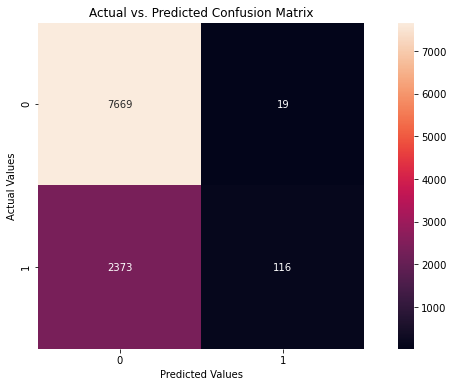

In [98]:
# plot confusion matrix
plt.figure(figsize=(12,6))
cm_df = pd.DataFrame(cm_array)
sns.heatmap(cm_df, square=True, annot=True, fmt='d')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Actual vs. Predicted Confusion Matrix')
plt.show()

## Area Under Curve (AUC)

In [90]:
prob_rf = model_rf.predict_proba(x_test)
prob_rf = prob_rf[:, 1]

In [91]:
fpr, tpr, th = roc_curve(y_test, prob_rf)
roc_auc = auc(fpr, tpr)
roc_auc

0.7342228542318773

<Figure size 576x432 with 0 Axes>

(0.0, 1.0)

(0.0, 1.05)

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'Area Under Curve')

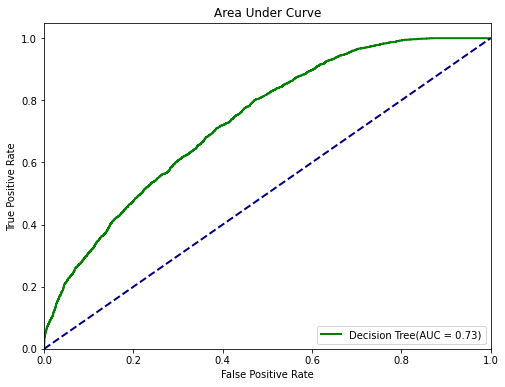

In [94]:
plt.figure(figsize=(8,6))
lw = 2
plt.plot(fpr, tpr, color='green',
         lw=lw, label='Decision Tree(AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under Curve')
plt.legend(loc="lower right")
plt.show()

In [99]:
recall_score(y_test, pred_rf)

0.046605062274005626

In [100]:
precision_score(y_test, pred_rf)

0.8592592592592593

In [101]:
print(classification_report(pred_rf, y_test))

              precision    recall  f1-score   support

           0       1.00      0.76      0.87     10042
           1       0.05      0.86      0.09       135

    accuracy                           0.76     10177
   macro avg       0.52      0.81      0.48     10177
weighted avg       0.98      0.76      0.85     10177



## Variable Importance

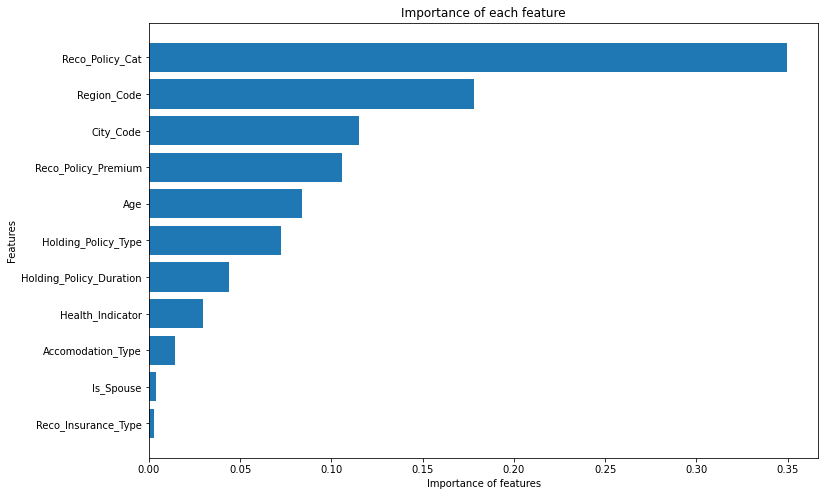

In [63]:
importances = model_rf.feature_importances_
names = df.columns
importances, names = zip(*sorted(zip(importances, names)))

plt.figure(figsize=(12,8))
plt.barh(range(len(names)), importances, align = 'center')
plt.yticks(range(len(names)), names)
plt.xlabel('Importance of features')
plt.ylabel('Features')
plt.title('Importance of each feature')
plt.show()

## XGBoost Classifier

In [51]:
from xgboost import XGBClassifier

In [52]:
model_xgb = XGBClassifier()

In [69]:
model_xgb.fit(x_train, y_train)

[18:12:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=15,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [70]:
print('Training Score: ', model_xgb.score(x_train, y_train)*100, '%')
print('Testing Score: ', model_xgb.score(x_test, y_test)*100, '%')

Training Score:  88.20292347377472 %
Testing Score:  75.33654318561463 %


In [71]:
prob_xgb = model_xgb.predict_proba(x_test)
prob_xgb = prob_xgb[:, 1]

In [72]:
fpr, tpr, th = roc_curve(y_test, prob_xgb)
roc_auc = auc(fpr, tpr)
roc_auc

0.6628529734787278

In [63]:
## Hyper Parameter Optimization
%%notify
start = time.time()

param_dist = {"learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
              "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
              "min_child_weight" : [ 1, 3, 5, 7 ],
              "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
              "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ] 
             }

random_search = RandomizedSearchCV(model_xgb, cv=5,
                                   param_distributions=param_dist,
                                   n_iter=5,
                                   scoring='roc_auc',
                                   n_jobs=-1,
                                   verbose=3)

random_search.fit(x_train, y_train)
print('Best Parameters using grid search: \n', random_search.best_params_)
end = time.time()
print('Time taken in grid search: {0: .2f}'.format(end - start))

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   48.0s finished


[18:07:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           gpu_id=-1, importance_type='gain',
                                           interaction_constraints='',
                                           learning_rate=0.300000012,
                                           max_delta_step=0, max_depth=6,
                                           min_child_weight=1, missing=nan,
                                           monotone_constraints='()',
                                           n_estimators=100, n_jobs=4,
                                           num_pa...
                                           reg_alpha=0, reg_lambda=1,
                                           scale_pos_weight=1, sub

Best Parameters using grid search: 
 {'min_child_weight': 1, 'max_depth': 15, 'learning_rate': 0.1, 'gamma': 0.0, 'colsample_bytree': 0.5}
Time taken in grid search:  54.63


In [64]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=15,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [65]:
random_search.best_params_

{'min_child_weight': 1,
 'max_depth': 15,
 'learning_rate': 0.1,
 'gamma': 0.0,
 'colsample_bytree': 0.5}

In [68]:
# Set best parameters given by grid search 
model_xgb.set_params(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=15,
              min_child_weight=1, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=15,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

## Predicting on the test dataset

In [33]:
test_df

,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Age,Is_Spouse,Health_Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium
0,1,156,0,0,30,0,1,6.0,3.0,5,11934.0
1,4,7,0,1,68,1,1,3.0,3.0,18,32204.8
2,1,564,1,0,28,0,3,2.0,4.0,17,9240.0
3,3,1177,1,0,23,0,3,3.0,3.0,18,9086.0
4,1,951,0,0,75,0,3,16.0,3.0,5,22534.0
...,...,...,...,...,...,...,...,...,...,...,...
21800,3,1044,0,0,45,0,1,4.0,1.0,18,15884.0
21801,4,266,0,0,59,0,5,6.0,3.0,18,21390.0
21802,12,2470,0,0,74,0,3,16.0,3.0,1,17836.0
21803,10,1676,1,0,25,0,4,3.0,1.0,19,11568.0


In [92]:
predict = model_rf.predict(test_df)

In [41]:
pd.DataFrame(predict, columns=['Response']).value_counts()

Response
0           21594
1             211
dtype: int64

In [93]:
##Create Sample Submission file and Submit
pred_df = pd.DataFrame(predict)
sub_df = pd.read_csv('sample_submission.csv')
datasets = pd.concat([sub_df['ID'],pred_df],axis=1)
datasets.columns = ['ID','Response']
datasets.to_csv('submission.csv',index=False)